In [44]:
import sys
sys.path.insert(0, '..')

In [45]:
import optimistix as optx


In [46]:
# Basic imports
import jax.numpy as np
import jax.random as jr
import jax.scipy as jsp
import jax
import numpy

#jax.config.update("jax_enable_x64", True)


# Optimisation imports
import zodiax as zdx
import optax

# dLux imports
import dLux as dl
import dLux.utils as dlu

# Visualisation imports
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "serif"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 72
plt.rcParams["font.size"] = 24

from detectors import *
from apertures import *
from models import *
from fisher import *
from stats import posterior
from fitting import *
from plotting import *
from spectra import *

import jax.tree_util as jtu

def set_array(pytree):
    dtype = np.float64 if jax.config.x64_enabled else np.float32
    floats, other = eqx.partition(pytree, eqx.is_inexact_array_like)
    floats = jtu.tree_map(lambda x: np.array(x, dtype=dtype), floats)
    return eqx.combine(floats, other)

In [47]:
extra_bad = None
#extra_bad = np.isnan(np.zeros((64, 64)).at[35,60].set(np.nan))

#extra_bad = np.isnan(np.zeros((wid,wid))).at[wid//2-3:wid//2+3,:].set(np.nan)


In [48]:
wid = 128
oversample = 4

nwavels = 50#13#6
npoly=10#10#2

n_zernikes = 15#12

optics = NICMOSOptics(1024, wid, oversample, n_zernikes = n_zernikes)

detector = NICMOSDetector(oversample, wid)

ddir = "../data/MAST_2024-09-22T03_37_01.724Z/HST/"

spectrum_basis = np.load("spectrum_basis.npy")[:,:npoly]

# brown dwarf

files = [
    #'n8yj53vfq_cal.fits',
    #'n8yj53vkq_cal.fits',
    'n8yj02x0q_cal.fits',
    #'n8yj02wyq_cal.fits'

]

files = [
    #'n8yj63wmq_cal.fits',
    #'n8yj63woq_cal.fits',
    #"n8yj63wlq_cal.fits",
    "n8yj63wnq_cal.fits"
]

"""

# lhs 1846
ddir = "../data/MAST_2025-03-02T22_29_29.259Z/HST/"

files = ["n8ku01ffq_cal.fits", "n8ku01fgq_cal.fits"][:1]

ddir = "../data/MAST_2024-09-08T07_59_18.213Z/HST/"

files = [
    # F095N
    "n43ca5fjq_cal.fits",
    "n43ca5fkq_cal.fits",
    "n43ca5flq_cal.fits",
    "n43ca5fmq_cal.fits",
    #F190N
    "n43ca5feq_cal.fits",
    "n43ca5ffq_cal.fits",
    "n43ca5fgq_cal.fits",
    "n43ca5fhq_cal.fits",
    #F187N
    #"n43c03dnq_cal.fits",
    #"n43c03doq_cal.fits",
    #"n43c03dpq_cal.fits",
    #"n43c03drq_cal.fits",
    #F108N
    #"n43c03dsq_cal.fits",
    #"n43c03duq_cal.fits",
    ##"n43c03dvq_cal.fits",
    ##"n43c03dwq_cal.fits",
][-1:]

# hyades

ddir = "../data/MAST_2024-09-26T22_53_13.719Z/HST/"

files = [
    "n8ry37p8q_cal.fits",
    "n8ry37p9q_cal.fits",

    #"n8ry13mqq_cal.fits",
    #"n8ry13mrq_cal.fits"
][:-1]


ddir = '../data/MAST_2025-03-06T11_35_52.340Z/HST/'

files = [
    #F110M
    'n4be02npq_cal.fits',
    'n4be02nsq_cal.fits',
    'n4be02nvq_cal.fits',
    'n4be02nyq_cal.fits',

    #F145M
    'n4be02nqq_cal.fits',
    'n4be02ntq_cal.fits',
    'n4be02nwq_cal.fits',
    'n4be02o0q_cal.fits',
]#[:1]#[-2:-1]
"""

#extra_bad = np.isnan(np.zeros((wid,wid))).at[wid//2-3:wid//2+3,:].set(np.nan)

#exposures_single = [exposure_from_file(ddir + file, SinglePointPolySpectrumFit(nwavels), crop=wid, extra_bad=extra_bad) for file in files]

#exposures_single = [exposure_from_file(ddir + file, SinglePointFit(CombinedFourierSpectrum, nwavels), crop=wid, extra_bad=extra_bad) for file in files]

#exposures_binary = [exposure_from_file(ddir + file, BinaryPolySpectrumFit(nwavels), crop=wid, extra_bad=extra_bad) for file in files]

files = [
    #'n8yj63wmq_cal.fits',
    #'n8yj63woq_cal.fits',
    #"n8yj63wlq_cal.fits",
    "n8yj63wnq_cal.fits"
]

ddir = "../data/MAST_2025-12-15T00_12_09.074Z/HST/"


"""exposures_single = [
    #exposure_from_file(ddir + "n8yj63wnq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),
    exposure_from_file(ddir + "n8yj63woq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),
    #exposure_from_file(ddir + "n8yj63wlq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),
    #exposure_from_file(ddir + "n8yj63wmq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),
    ]"""

exposures_single = [
    #exposure_from_file(ddir + "n8yj63wnq_cal.fits", SinglePointFit(spectrum_basis, "F110W"), crop=wid),
    #exposure_from_file(ddir + "n8yj63wnq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),
    exposure_from_file(ddir + "n9nk05mfq_cal.fits", SinglePointFit(spectrum_basis, "F110W"), crop=wid),
    #exposure_from_file(ddir + "n8yj63wlq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),
    #exposure_from_file(ddir + "n8yj63wmq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),
    ]

"""files = [
    #'n8yj53vfq_cal.fits',
    #'n8yj53vkq_cal.fits',
    'n8yj02x0q_cal.fits',
    #'n8yj02wyq_cal.fits'

]
exposures_single = [
    #exposure_from_file(ddir + "n8yj02wxq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),
    exposure_from_file(ddir + "n8yj02wzq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),
    exposure_from_file(ddir + "n8yj02x0q_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),
    #exposure_from_file(ddir + "n8yj02wyq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),
    ]
"""

183 67


/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_49468/3657760225.py:124: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposure_from_file(ddir + "n9nk05mfq_cal.fits", SinglePointFit(spectrum_basis, "F110W"), crop=wid),


'files = [\n    #\'n8yj53vfq_cal.fits\',\n    #\'n8yj53vkq_cal.fits\',\n    \'n8yj02x0q_cal.fits\',\n    #\'n8yj02wyq_cal.fits\'\n\n]\nexposures_single = [\n    #exposure_from_file(ddir + "n8yj02wxq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),\n    exposure_from_file(ddir + "n8yj02wzq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 5), crop=wid),\n    exposure_from_file(ddir + "n8yj02x0q_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),\n    #exposure_from_file(ddir + "n8yj02wyq_cal.fits", SinglePointFit(CombinedFourierSpectrum, 15), crop=wid),\n    ]\n'

In [49]:
for e in exposures_single:
    print(e.mjd)#*86400)
    print(e.target)
    print(e.filter)

53957.06017156
U10320
F110W


In [50]:
params = {
    #"fluxes": {},
    "positions": {},
    "spectrum": {},
    "aberrations": {},

    #"rot": 0.,

    "cold_mask_shift": {},
    "cold_mask_rot": {},
    "cold_mask_scale": {},
    "cold_mask_shear": {},
    "primary_scale": {},
    "primary_rot": {},
    "primary_shear": {},
    "outer_radius": 1.2*0.955,
    "secondary_radius": 0.372*1.2,
    "spider_width": 0.077*1.2,
    "scale": 0.043142,

    "softening": 2.,#0.1,
    "bias": {},
    "jitter": {},
    #"displacement": 1.#1e5#{}
}

positions = [[0.,0.,],[0.,0.,],[0.,0.,],[0.,0.,]]#[[0.43251792, 0.33013815],[ 0.49417186, -0.5629123 ]]

positions_dict = {'n8yj02wxq': np.asarray([-0.24098018,  0.5766413 ]), 'n8yj02wyq': np.asarray([-0.2771823 ,  0.45730695]), 'n8yj02wzq': np.asarray([-0.6211268 , -0.68924445]), 'n8yj02x0q': np.asarray([ 0.45046756, -0.8387074 ])}
nspec = [npoly]#[3, 10, 3, 10]#[3, 10]
nw = [nwavels]#[5, 15, 5, 15]#[5, 15]

for idx, exp in enumerate(exposures_single):
    params["positions"][exp.fit.get_key(exp, "positions")] = np.asarray([0.,0.])#positions_dict[exp.fit.get_key(exp, "positions")]#np.asarray(positions[idx])#np.asarray([0.49162114, -0.5632928])#np.asarray([ 0.45184505, -0.8391668 ])#np.asarray([-0.2,0.4])
    params["spectrum"][exp.fit.get_key(exp, "spectrum")] = (np.zeros(npoly)).at[0].set(13.1)#np.asarray([-1.03646245, -0.29984712, -0.14137265, -0.04618831, -0.05788671, -0.02545625,
 #-0.03688181,  0.0231736,   0.02356589, -0.00177967]).at[0].set(np.log10(np.nansum(exp.data)/nw[idx]))#np.zeros(nspec[idx]).at[0].set(1)*np.log10(np.nansum(exp.data)/nw[idx])#np.ones(npoly)*np.log10(np.nansum(exp.data)/nwavels)#(np.zeros(npoly)).at[0].set(1)*np.log10(np.nansum(exp.data)/nwavels)
    params["aberrations"][exp.fit.get_key(exp, "aberrations")] = np.zeros(n_zernikes)#np.asarray([0., 24.884588  , -25.489779  , -17.15699   , -21.790146  ,
    #      -4.592212  ,  -4.832893  ,  19.196083  ,   0.37983412,
    #       7.0756216 ,   0.30277824,  -6.330534])#np.zeros(n_zernikes)
    params["cold_mask_shift"][exp.fit.get_key(exp, "cold_mask_shift")] = np.asarray([8.,8.])#np.asarray([9.599048, 6.196583])
    params["cold_mask_rot"][exp.fit.get_key(exp, "cold_mask_rot")] = -45.
    params["cold_mask_scale"][exp.fit.get_key(exp, "cold_mask_scale")] = np.asarray([1.,1.])
    params["cold_mask_shear"][exp.fit.get_key(exp, "cold_mask_shear")] = np.asarray([0.,0.])
    params["primary_rot"][exp.fit.get_key(exp, "primary_rot")] = -45. + 90. 
    params["primary_scale"][exp.fit.get_key(exp, "primary_scale")] = np.asarray([1.,1.])
    params["primary_shear"][exp.fit.get_key(exp, "primary_shear")] = np.asarray([0.,0.])
    #params["displacement"][exp.fit.get_key(exp, "displacement")] = 1e6

    params["bias"][exp.fit.get_key(exp, "bias")] = 0.
    params["jitter"][exp.fit.get_key(exp, "jitter")] = 7/43*oversample


model_single = set_array(NICMOSModel(exposures_single, params, optics, detector))
#model_binary = set_array(NICMOSModel(exposures_binary, params, optics, detector))


params = ModelParams(params)

In [51]:
print(np.nansum(exp.data))

8155.192


In [52]:
np.log10(7336/np.sum(10**spectrum_basis[:,0]))

Array(2.0250726, dtype=float32)

In [53]:
print(params.params)

{'positions': {'n9nk05mfq': Array([0., 0.], dtype=float32)}, 'spectrum': {'U10320_F110W': Array([13.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],      dtype=float32)}, 'aberrations': {'global': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32)}, 'cold_mask_shift': {'53957': Array([8., 8.], dtype=float32)}, 'cold_mask_rot': {'global': -45.0}, 'cold_mask_scale': {'F110W': Array([1., 1.], dtype=float32)}, 'cold_mask_shear': {'F110W': Array([0., 0.], dtype=float32)}, 'primary_scale': {'F110W': Array([1., 1.], dtype=float32)}, 'primary_rot': {'F110W': 45.0}, 'primary_shear': {'F110W': Array([0., 0.], dtype=float32)}, 'outer_radius': 1.146, 'secondary_radius': 0.44639999999999996, 'spider_width': 0.0924, 'scale': 0.043142, 'softening': 2.0, 'bias': {'n9nk05mfq': 0.0}, 'jitter': {'n9nk05mfq': 0.6511627906976745}}


4.233261


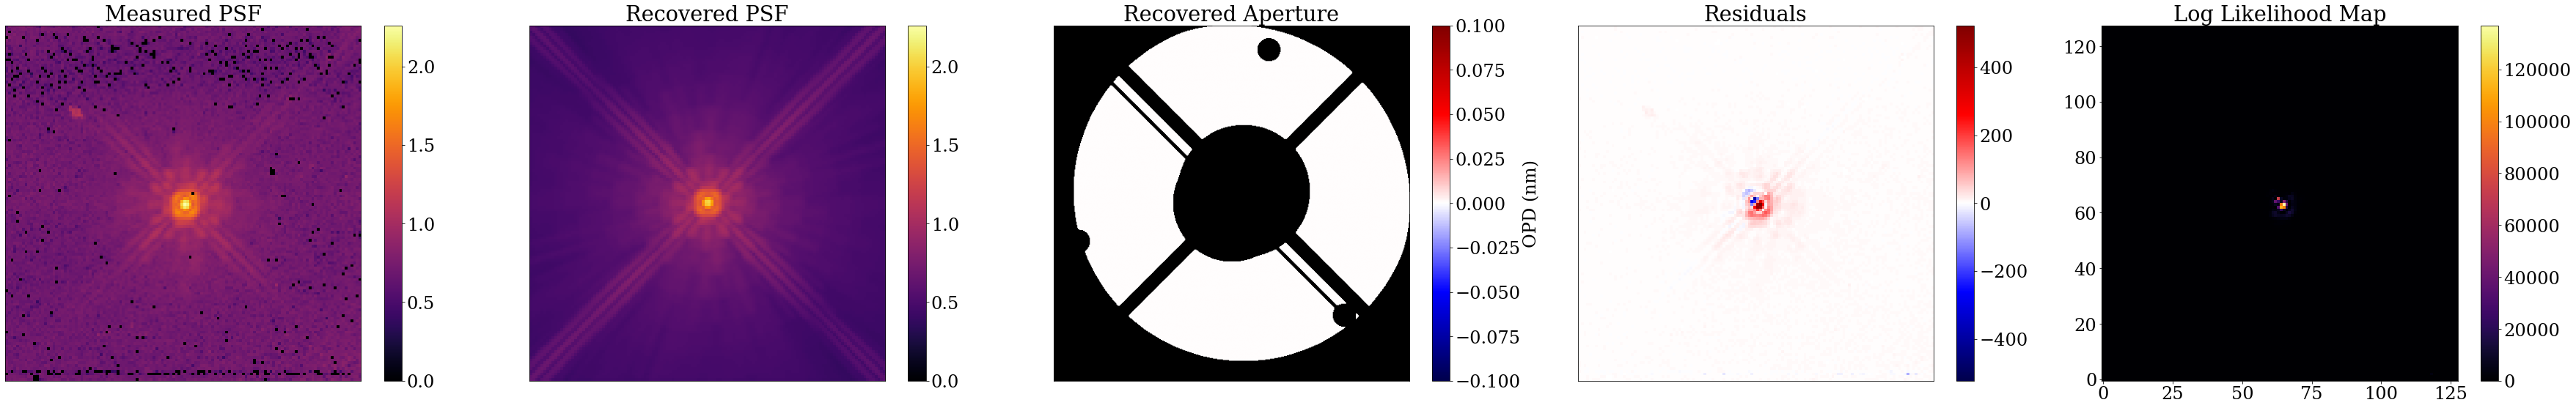

In [54]:
plot_comparison(model_single, params, exposures_single)

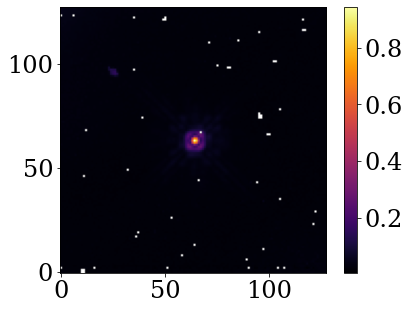

In [55]:
plt.imshow(exposures_single[0].err)
plt.colorbar()

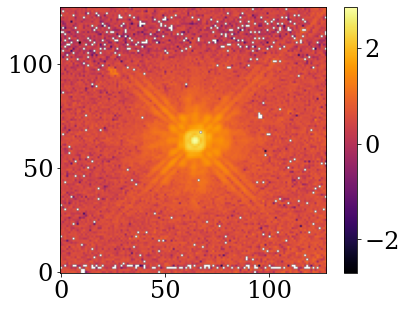

In [56]:
plt.imshow(np.log10(exposures_single[0].data/exposures_single[0].err))
plt.colorbar()

In [57]:
print(exposures_single[0].exptime)

143.9167


([], [])

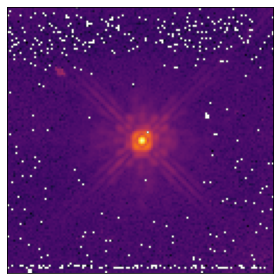

In [58]:
plt.imshow(exposures_single[0].data**0.125)
plt.xticks([])
plt.yticks([])

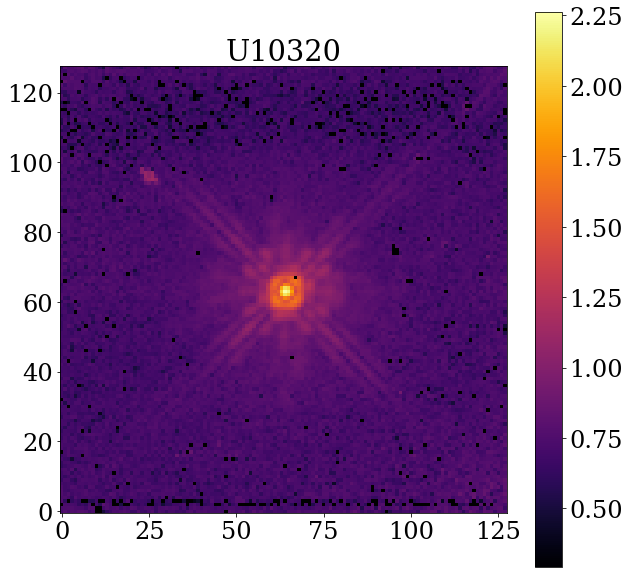

In [59]:
cmap = matplotlib.colormaps['inferno']
cmap.set_bad('k',1)
plt.figure(figsize=(10,10))
plt.imshow(exposures_single[0].data**0.125, cmap=cmap)
plt.title(exposures_single[0].target)
plt.colorbar()


In [60]:
def scheduler(lr, start, *args):
    shed_dict = {start: 1e10}
    for start, mul in args:
        shed_dict[start] = mul
    return optax.piecewise_constant_schedule(lr / 1e10, shed_dict)

base_sgd = lambda vals: optax.sgd(vals, nesterov=True, momentum=0.6)

opt = lambda lr, start, *schedule: base_sgd(scheduler(lr, start, *schedule))

base_sgd2 = lambda vals: optax.noisy_sgd(vals)

opts = lambda lr, start, *schedule: base_sgd2(scheduler(lr, start, *schedule))


base_adam = lambda vals: optax.adam(vals)
opta = lambda lr, start, *schedule: base_adam(scheduler(lr, start, *schedule))





def flatten(l):
    if isinstance(l, (tuple, list)):
         return [a for i in l for a in flatten(i)]
    else:
        return [l]



g = 5e-2

things = {
    "positions": opt(g*5, 0),
    "spectrum": opt(g*2, 10),#opt(g*2, 10),#opt(g*2, 10),#, (20, 1.5)),
    "cold_mask_shift": opt(g*10, 30),
    #"cold_mask_rot": opt(g*10, 100),
    "bias": opt(g*5, 20),
    "aberrations": opt(g*0.05, 50),

    #"cold_mask_scale": opt(g*1, 300),
    #"cold_mask_shear": opt(g*1, 300),
    #"primary_scale": opt(g*1, 300),
    #"primary_shear": opt(g*1, 300),
}

things_start = {
    "positions": opt(g*5, 0),
}

groups = list(things.keys())

In [61]:
initial_losses, initial_models = optimise(params, model_single, exposures_single, things_start, 10, recalculate=True)

Calculating Fishers


  0%|          | 0/1 [00:00<?, ?it/s]

{'n9nk05mfq.positions': Array([[2014374.8 , -584107.94],
       [-584107.94, 1876374.4 ]], dtype=float32)}
Fitting Model


  0%|          | 0/10 [00:00<?, ?it/s]

4.117483


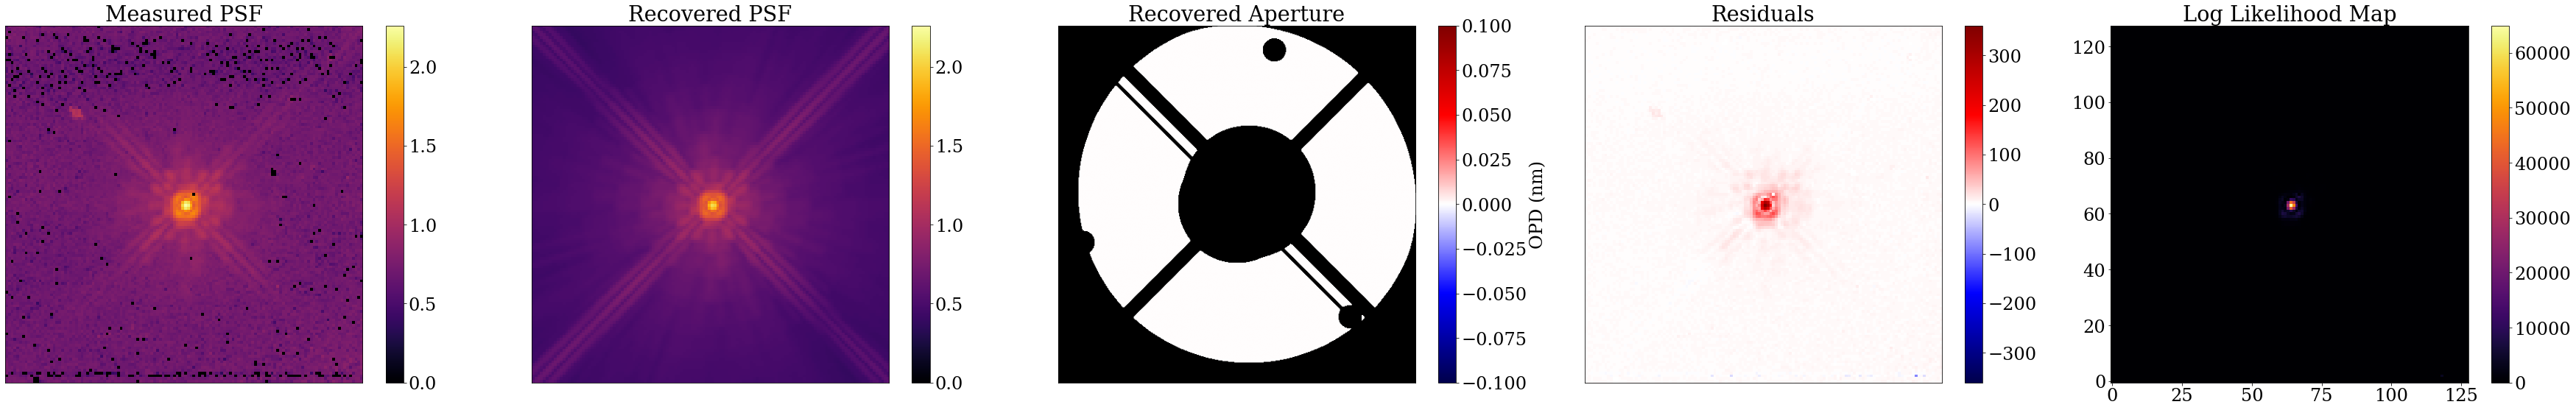

In [62]:
plot_comparison(model_single, initial_models[-1], exposures_single)

In [20]:
initial_models[-1].params

{'positions': {'n9nk05mfq': Array([ 0.6553935, -0.6802262], dtype=float32)}}

In [21]:
losses, models = optimise(initial_models[-1].inject(params), initial_models[-1].inject(model_single), exposures_single, things, 300, recalculate=True)

Calculating Fishers


  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

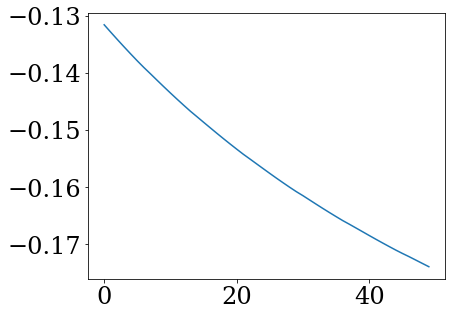

In [ ]:
plt.plot(np.asarray(losses[-50:])/(len(exposures_single)*wid**2))

In [ ]:
print(losses[0], losses[-1])

135851.58 -2849.2498


In [ ]:
models_pd = [jax.tree.map(lambda x,y: (x-y)/y, models[i], models[-1]) for i in range(len(models))]

5
1.4935553


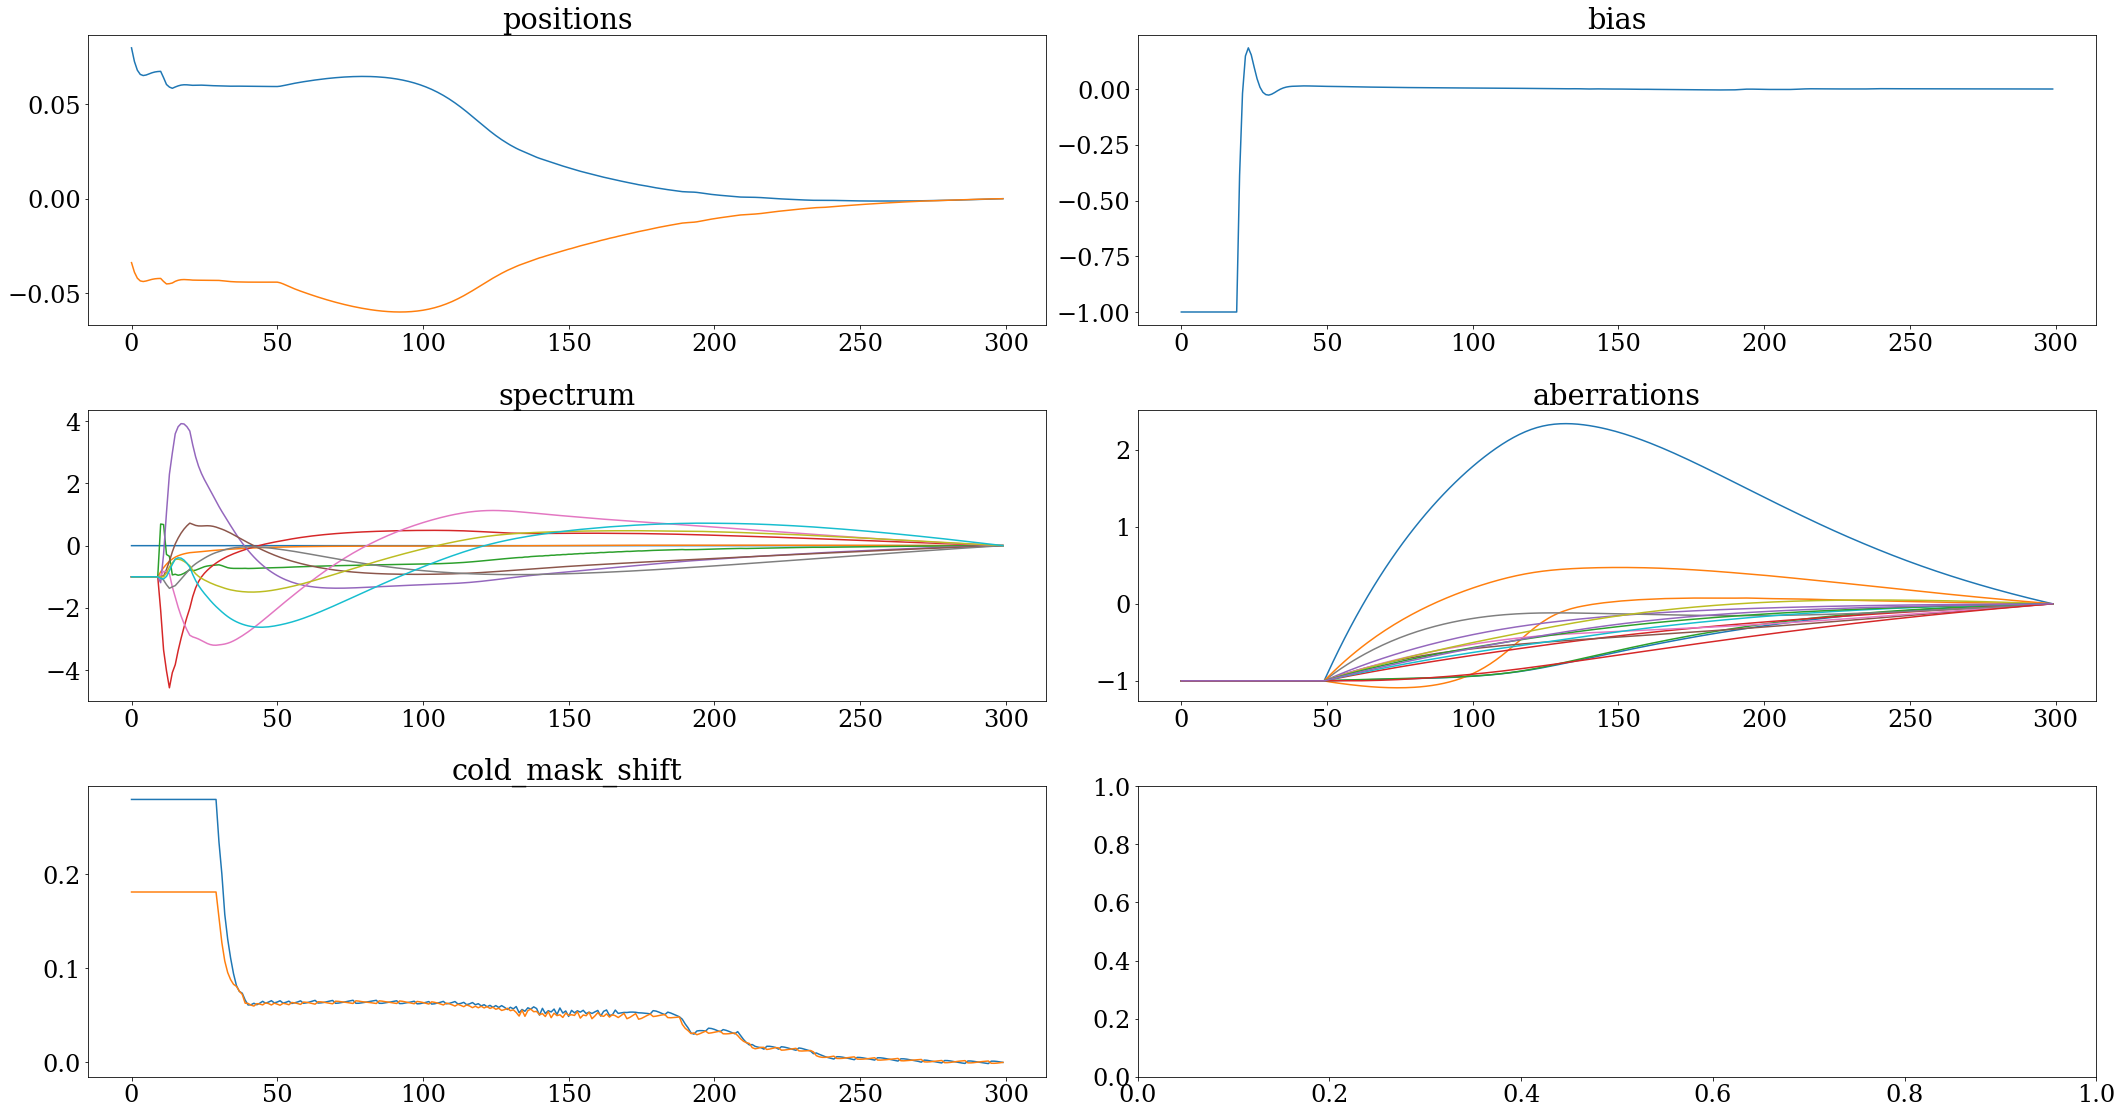

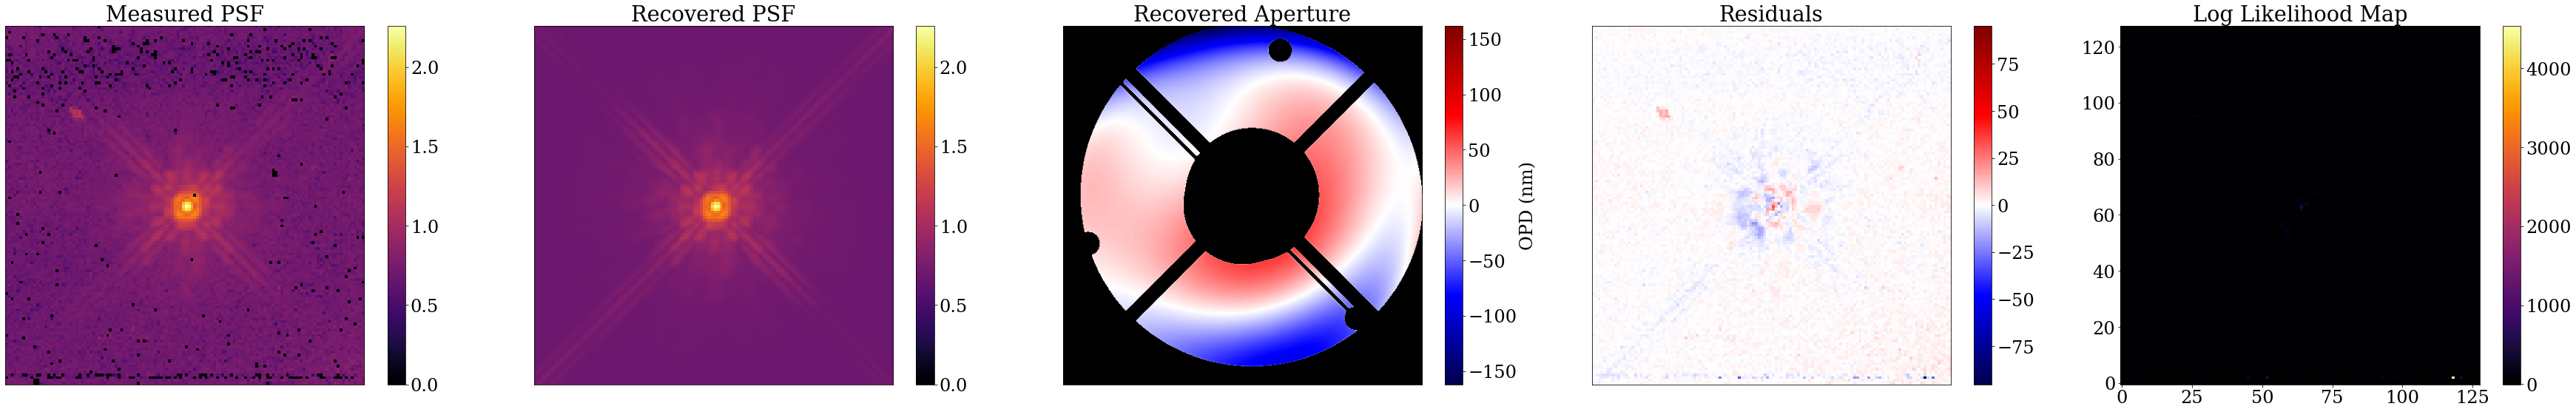

In [ ]:
plot_params(models_pd, groups, xw = 3)
plot_comparison(model_single, models[-1], exposures_single)

In [ ]:
print(models[-1].params)

{'aberrations': {'global': Array([-29.907215 ,  21.053658 ,  -8.326529 ,  -4.1334753,  -3.6209886,
        -1.9257134,  -0.6063492,   1.8081015,   3.54969  ,   4.0319953,
         1.4648812,   3.6047118,  11.107654 ,  -3.7537084,  -1.0122789],      dtype=float32)}, 'bias': {'n9nk05mfq': Array(0.04504307, dtype=float32)}, 'cold_mask_shift': {'53957': Array([6.2540283, 6.774456 ], dtype=float32)}, 'positions': {'n9nk05mfq': Array([ 0.6012985, -0.6844983], dtype=float32)}, 'spectrum': {'U10320_F110W': Array([12.917937  , -1.2947885 ,  0.3458026 , -0.2089896 ,  0.0902286 ,
       -0.19683065, -0.08667222,  0.13144849,  0.07910561,  0.04718538],      dtype=float32)}}


In [ ]:
models[-1].inject(model_single)

NICMOSModel(
  params={
    'aberrations': {'global': f32[15]},
    'bias': {'n9nk05mfq': f32[]},
    'cold_mask_rot': {'global': f32[]},
    'cold_mask_scale': {'F110W': f32[2]},
    'cold_mask_shear': {'F110W': f32[2]},
    'cold_mask_shift': {'53957': f32[2]},
    'jitter': {'n9nk05mfq': f32[]},
    'outer_radius': f32[],
    'positions': {'n9nk05mfq': f32[2]},
    'primary_rot': {'F110W': f32[]},
    'primary_scale': {'F110W': f32[2]},
    'primary_shear': {'F110W': f32[2]},
    'scale': f32[],
    'secondary_radius': f32[],
    'softening': f32[],
    'spectrum': {'U10320_F110W': f32[10]},
    'spider_width': f32[]
  },
  filters={'F110W': f32[238,2]},
  optics=NICMOSOptics(
    wf_npixels=1024,
    diameter=f32[],
    layers={
      'CompoundAperture':
      CompoundAperture(
        normalise=True,
        transformation=CoordTransform(
          translation=None, rotation=f32[], compression=None, shear=None
        ),
        apertures={
          'cold_mask':
          NICMOSC

In [ ]:
models[-1]

ModelParams(
  params={
    'aberrations': {'global': f32[15]},
    'bias': {'n9nk05mfq': f32[]},
    'cold_mask_shift': {'53957': f32[2]},
    'positions': {'n9nk05mfq': f32[2]},
    'spectrum': {'U10320_F110W': f32[10]}
  }
)

In [ ]:
groups

['positions', 'spectrum', 'cold_mask_shift', 'bias', 'aberrations']

In [ ]:
#stop

In [ ]:
#fsh = calc_fishers(models[-1].inject(model_single), exposures_single, groups, fisher_fn, recalculate=True, save=False)


In [ ]:
def loss_fn(params, exposures, model):
    mdl = params.inject(model)
    res = np.sum(np.asarray([posterior(mdl,exposure) for exposure in exposures]))
    return np.where(res==0.0, np.inf, res)

@eqx.filter_jit
def fun(params, args):
    exposures, model = args
    return loss_fn(params, exposures, model)

def optimise_optimistix(params, model, exposures, things, niter):
    paths = list(things.keys())
    optimisers = [things[i] for i in paths]

    model_params = ModelParams({p: params.get(p) for p in things.keys()})

    solver = optx.BFGS(rtol=1e-6, atol=1e-6,verbose=frozenset({"step_size", "loss"}))
    sol = optx.minimise(fun, solver, model_params, (exposures, model), throw=False, max_steps=niter)
    
    return sol



In [ ]:
sol = optimise_optimistix(models[-1], models[-1].inject(model_single), exposures_single, things, 5000)
print(sol.value.params)
print(fun(sol.value, (exposures_single, model_single)), (losses[-1]))

Loss on this step: -2858.736328125, Loss on the last accepted step: 0.0, Step size: 1.0
Loss on this step: inf, Loss on the last accepted step: -2858.736328125, Step size: 0.5
Loss on this step: inf, Loss on the last accepted step: -2858.736328125, Step size: 0.25
Loss on this step: 2.9116020134836085e+36, Loss on the last accepted step: -2858.736328125, Step size: 0.125
Loss on this step: 1.59096482605048e+21, Loss on the last accepted step: -2858.736328125, Step size: 0.0625
Loss on this step: 35767845912576.0, Loss on the last accepted step: -2858.736328125, Step size: 0.03125
Loss on this step: 7140393984.0, Loss on the last accepted step: -2858.736328125, Step size: 0.015625
Loss on this step: 52144096.0, Loss on the last accepted step: -2858.736328125, Step size: 0.0078125
Loss on this step: 16205682.0, Loss on the last accepted step: -2858.736328125, Step size: 0.00390625
Loss on this step: 2897947.25, Loss on the last accepted step: -2858.736328125, Step size: 0.001953125
Loss 

In [ ]:
final_params = sol.value
#final_params = models[-1]

In [ ]:
#sol.stats

1.4642164


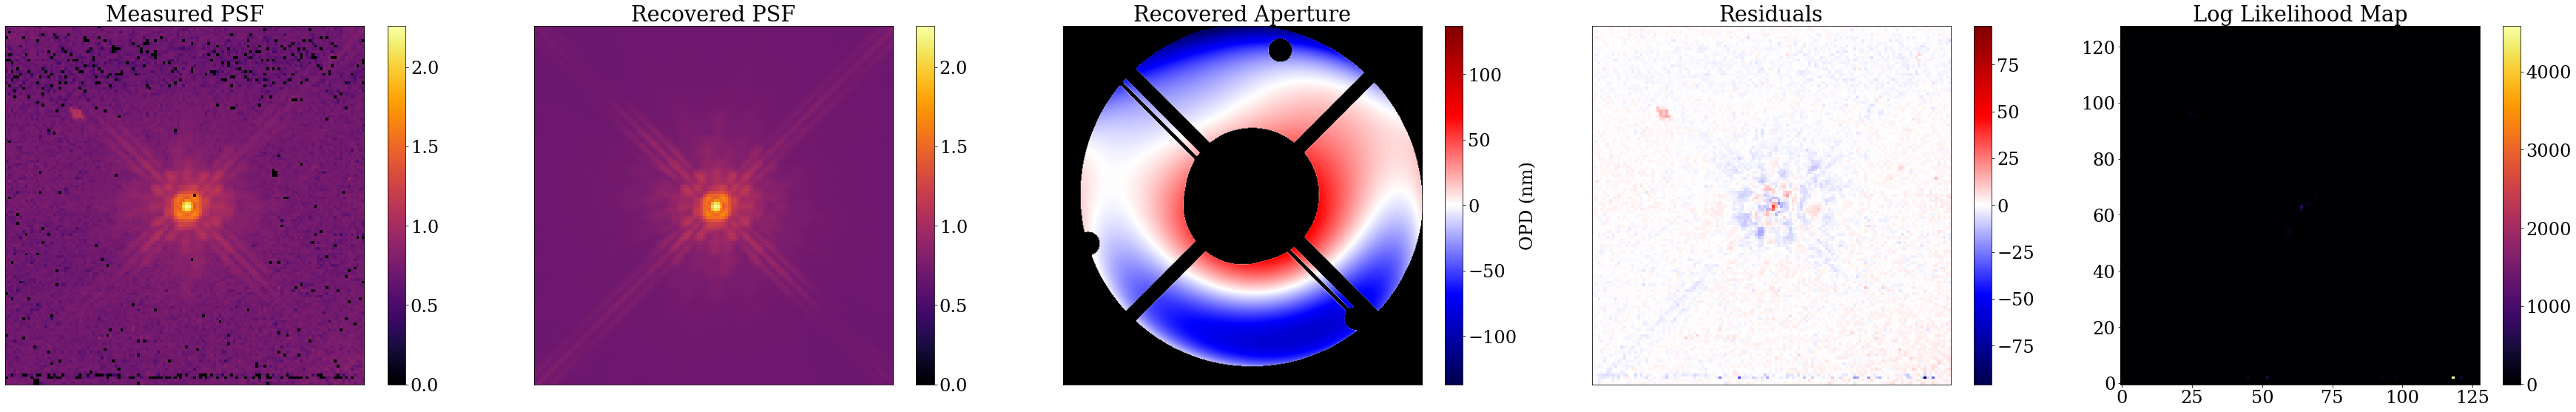

In [ ]:
plot_comparison(final_params.inject(models[-1].inject(model_single)), final_params, exposures_single)

In [ ]:
fsh = calc_fishers(final_params.inject(model_single), exposures_single, ["spectrum"], fisher_fn, recalculate=True, save=False)
fsh

  0%|          | 0/1 [00:00<?, ?it/s]

{'n9nk05mfq.spectrum': Array([[ 9.05602625e+05, -2.86294438e+05,  1.61604641e+05,
         -1.08711289e+04,  8.11381094e+04, -4.41020781e+04,
          1.68055840e+04,  9.19841797e+04,  2.23621777e+04,
          5.59636621e+03],
        [-2.86294500e+05,  1.68278609e+05, -2.46981699e+04,
         -7.80208545e+03, -3.70404258e+04,  2.20034883e+04,
         -1.56464102e+04, -2.80870391e+04, -3.73716089e+03,
         -1.81830078e+02],
        [ 1.61604766e+05, -2.46981738e+04,  6.01783438e+04,
          5.91926465e+03,  6.16886084e+03, -1.68818262e+03,
         -2.22105591e+03,  1.47824717e+04,  5.37074023e+03,
          3.39690161e+03],
        [-1.08711357e+04, -7.80207959e+03,  5.91925977e+03,
          1.57261396e+04,  1.86322876e+03,  2.83855566e+03,
         -5.92922791e+02, -3.15643750e+03,  1.08465500e+02,
          8.31853455e+02],
        [ 8.11380000e+04, -3.70404375e+04,  6.16885547e+03,
          1.86322729e+03,  1.99607070e+04, -7.61966650e+03,
          2.10972363e+03,  7.0

In [ ]:
spectrum_cov = np.linalg.inv(fsh['n9nk05mfq.spectrum'])#+fsh['n8yj02wyq.spectrum'])
spectrum_err = np.diag(np.sqrt(np.abs(spectrum_cov)))

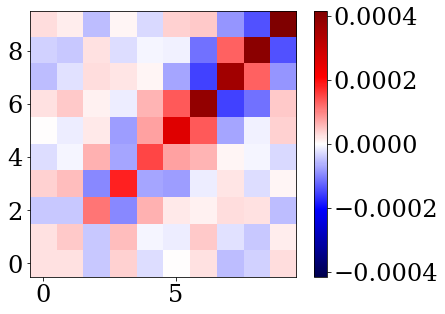

In [ ]:
plt.imshow(spectrum_cov, cmap='seismic', vmin=-np.max(np.abs(spectrum_cov)), vmax=np.max(np.abs(spectrum_cov)))
plt.colorbar()


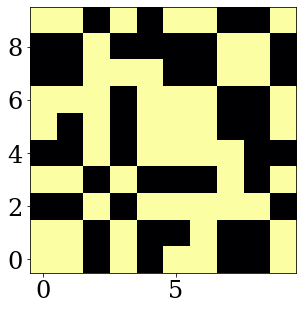

In [ ]:
plt.imshow(np.sign(spectrum_cov))

In [ ]:
npoly=10

In [ ]:
vals, vects = np.linalg.eig(fsh['n9nk05mfq.spectrum'])#+fsh['n8yj02wyq.spectrum'])

order = np.argsort(vals)[::-1]

#plt.figure(figsize=(10,10))
#plt.xlabel("Coefficient")

#for i in range(5):
#    plt.plot(np.arange(npoly),np.real(vects[:,order[i]]), label=f"{i}")
#plt.legend()

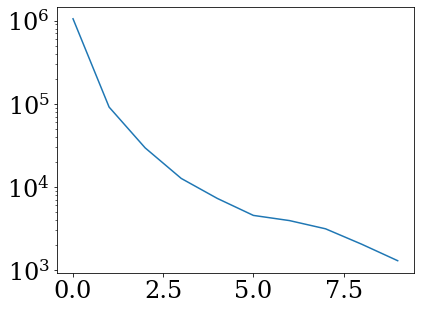

In [ ]:
plt.semilogy(np.sort(np.real(vals))[::-1])

In [ ]:
vals[order]

Array([1050632.9   +0.j,   91039.57  +0.j,   29393.965 +0.j,
         12615.092 +0.j,    7252.6436+0.j,    4530.8057+0.j,
          3925.633 +0.j,    3127.057 +0.j,    2042.572 +0.j,
          1292.1847+0.j], dtype=complex64)

Text(0.5, 0, 'Wavelength (um)')

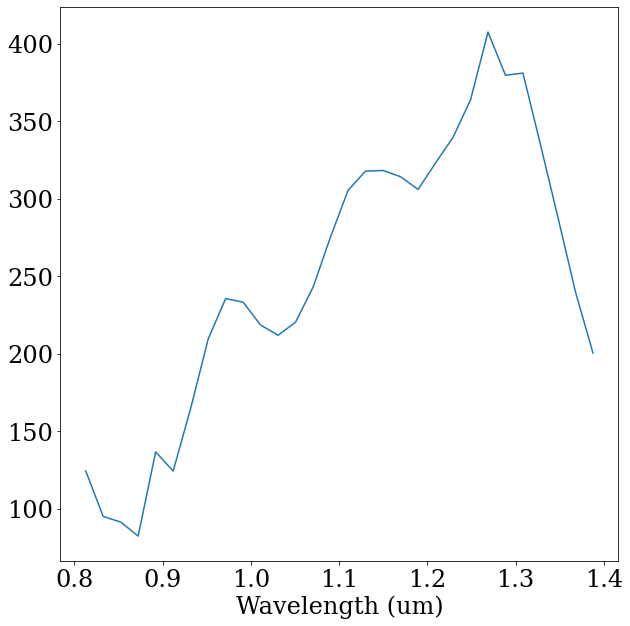

In [ ]:
plt.figure(figsize=(10,10))

wv, filt = calc_throughput("F110W", nwavels=30)

spec = CombinedBasisSpectrum(wv, filt, final_params.get("spectrum.U10320_F110W"), spectrum_basis)

#spec = CombinedFourierSpectrum(wv, filt, final_params.get("spectrum.U10320_F110W"))

#HD201592_F110M

#plt.plot(wavels, params.get("spectrum.U10764_F110W"))
plt.plot(wv*1e6, spec.spec_weights())#*spec.flux/(wv*1e6))#, yerr = spectrum_err)
plt.xlabel("Wavelength (um)")


In [ ]:
symmetric_cov = spectrum_cov + spectrum_cov.T - np.diag(spectrum_cov.diagonal())

In [ ]:
from jax.numpy import linalg as la
def nearestPD(A):
    """Find the nearest positive-definite matrix to input

    A Python/Numpy port of John D'Errico's `nearestSPD` MATLAB code [1], which
    credits [2].

    [1] https://www.mathworks.com/matlabcentral/fileexchange/42885-nearestspd

    [2] N.J. Higham, "Computing a nearest symmetric positive semidefinite
    matrix" (1988): https://doi.org/10.1016/0024-3795(88)90223-6
    """

    B = (A + A.T) / 2
    _, s, V = la.svd(B)

    H = np.dot(V.T, np.dot(np.diag(s), V))

    A2 = (B + H) / 2

    A3 = (A2 + A2.T) / 2

    if isPD(A3):
        return A3

    spacing = np.spacing(la.norm(A))
    # The above is different from [1]. It appears that MATLAB's `chol` Cholesky
    # decomposition will accept matrixes with exactly 0-eigenvalue, whereas
    # Numpy's will not. So where [1] uses `eps(mineig)` (where `eps` is Matlab
    # for `np.spacing`), we use the above definition. CAVEAT: our `spacing`
    # will be much larger than [1]'s `eps(mineig)`, since `mineig` is usually on
    # the order of 1e-16, and `eps(1e-16)` is on the order of 1e-34, whereas
    # `spacing` will, for Gaussian random matrixes of small dimension, be on
    # othe order of 1e-16. In practice, both ways converge, as the unit test
    # below suggests.
    I = np.eye(A.shape[0])
    k = 1
    while not isPD(A3):
        mineig = np.min(np.real(la.eigvals(A3)))
        A3 += I * (-mineig * k**2 + spacing)
        k += 1

    return A3


def isPD(B):
    """Returns true when input is positive-definite, via Cholesky"""
    try:
        _ = la.cholesky(B)
        return True
    except la.LinAlgError:
        return False


In [ ]:
spec.wavelengths

Array([8.1290835e-07, 8.3272499e-07, 8.5254169e-07, 8.7235833e-07,
       8.9217502e-07, 9.1199172e-07, 9.3180830e-07, 9.5162500e-07,
       9.7144175e-07, 9.9125828e-07, 1.0110750e-06, 1.0308917e-06,
       1.0507084e-06, 1.0705251e-06, 1.0903417e-06, 1.1101583e-06,
       1.1299750e-06, 1.1497917e-06, 1.1696084e-06, 1.1894250e-06,
       1.2092418e-06, 1.2290583e-06, 1.2488750e-06, 1.2686917e-06,
       1.2885083e-06, 1.3083251e-06, 1.3281417e-06, 1.3479585e-06,
       1.3677750e-06, 1.3875917e-06], dtype=float32)

In [ ]:
final_params.get("spectrum.U10320_F110W")

Array([12.884378  , -1.3455118 ,  0.42384958, -0.2638871 ,  0.21221636,
       -0.0792306 , -0.03789463,  0.28305328,  0.11545548, -0.05053949],      dtype=float32)

In [ ]:
wv[:-1]*1e6

Array([0.81290835, 0.832725  , 0.8525417 , 0.8723583 , 0.892175  ,
       0.9119917 , 0.9318083 , 0.951625  , 0.97144175, 0.99125826,
       1.011075  , 1.0308917 , 1.0507084 , 1.070525  , 1.0903417 ,
       1.1101583 , 1.129975  , 1.1497917 , 1.1696084 , 1.189425  ,
       1.2092417 , 1.2290583 , 1.248875  , 1.2686917 , 1.2885083 ,
       1.308325  , 1.3281417 , 1.3479584 , 1.367775  ], dtype=float32)

In [ ]:
s = spec.spec_weights()[:-1]
s/s.sum() #/( wv[:-1]*1e9 /1e4)

Array([0.01708018, 0.01304047, 0.0125475 , 0.01130449, 0.01876293,
       0.01706018, 0.0226003 , 0.02874394, 0.03233545, 0.03201845,
       0.02999114, 0.02908921, 0.03025027, 0.03334626, 0.03781149,
       0.04192692, 0.04362856, 0.043682  , 0.04312954, 0.04200033,
       0.04434067, 0.04662167, 0.04992619, 0.05593912, 0.05211331,
       0.05230577, 0.0459617 , 0.03951176, 0.03293021], dtype=float32)

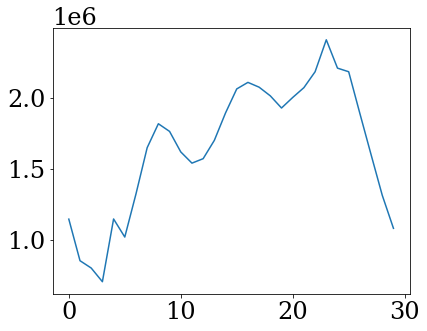

In [ ]:
plt.plot(spec.spec_weights()*spec.flux/(wv*1e6))

Text(0, 0.5, 'Flux')

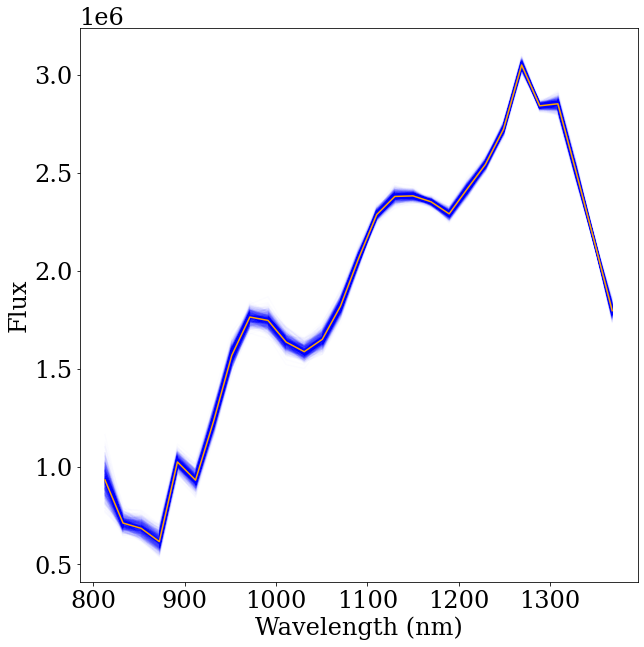

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(wv[:-1]*1e9, spec.spec_weights()[:-1]*spec.flux, color='orange')
for i in range(1000):
    coeffs = numpy.random.multivariate_normal(final_params.get("spectrum.U10320_F110W"), nearestPD(symmetric_cov))
    spec = CombinedBasisSpectrum(wv, filt, coeffs, spectrum_basis)#CombinedFourierSpectrum(wv, filt, coeffs)
    plt.plot(wv[:-1]*1e9, spec.spec_weights()[:-1]*spec.flux, color='b', alpha=0.01, zorder=0)
    #plt.plot(wv*1e9, spec.spec_weights()*spec.flux, color='b', alpha=0.01, zorder=0)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux")


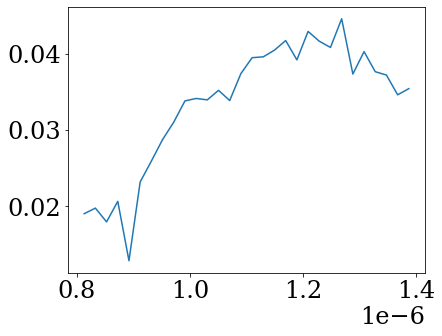

In [ ]:
plt.plot(spec.wavelengths, spec.filt_weights)

In [ ]:
bad = np.ones((wid, wid))

In [ ]:
for i in range(8):
    pst = posterior(models[-1].inject(model_single),exposures_single[0],return_im=True)
    idx = np.unravel_index(np.nanargmax(pst*bad), pst.shape)
    bad = bad.at[idx].set(np.nan)


In [ ]:
extra_bad = np.isnan(bad)

In [ ]:
idx

(Array(2, dtype=int32), Array(93, dtype=int32))

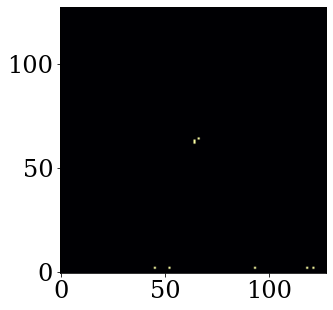

In [ ]:
plt.imshow(extra_bad)

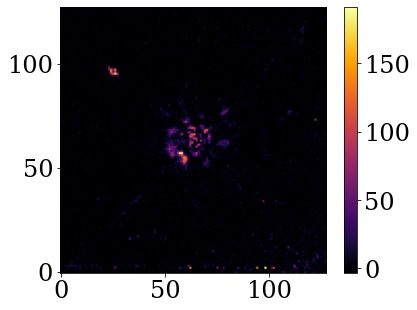

In [ ]:
plt.imshow(pst*(1-extra_bad))
plt.colorbar()

In [ ]:
jsp.stats.norm.logpdf(0,0,0.1)

Array(1.3836465, dtype=float32, weak_type=True)

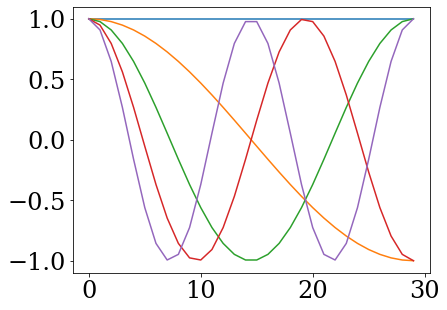

In [ ]:
xs = np.linspace(0, 2*np.pi, 30)

for i,c in enumerate(np.ones(5)):
    plt.plot(np.cos(xs * i/2)*c)